## ASSIGNMENT 6

## RISHITHA REDDY NALLAKALVA

## 700742428

1) (Provide only mathematical solutions for this question) Six points with the following attributes
are given, calculate and find out clustering representations and dendrogram using Single,
complete, and average link proximity function in hierarchical clustering technique.
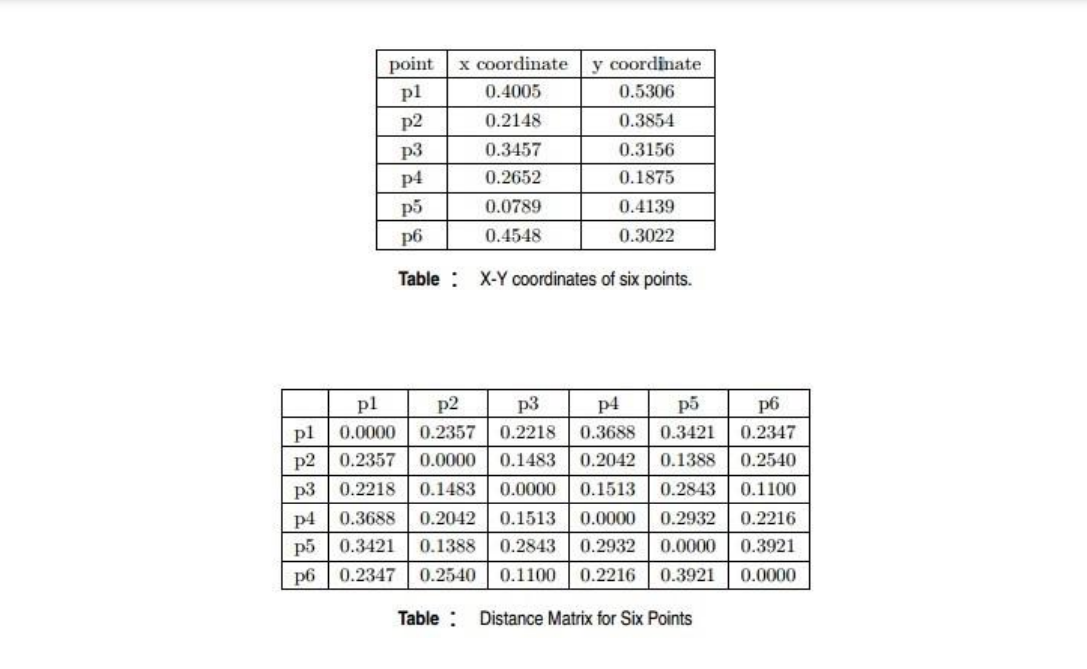

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist
X_Array = np.array([0.4005,0.2148,0.3457,0.2652,0.0789,0.4548])
Y_Array = np.array([0.5306,0.3854,0.3156,0.1875,0.4139,0.3022])
six_points = ['P1','P2','P3','P4','P5','P6']
data_set = pd.DataFrame({'six_points':six_points, 'x cordinates':X_Array, 'y cordinates':Y_Array})
data_set = data_set.set_index('six_points')
#six_points in table
print(data_set,"pointing six point as x and y coordinates in table")
distance_df = pd.DataFrame(squareform(np.round(pdist(data[['x cordinates', 'y cordinates']]),4), 'euclidean'), columns=data_set.index.values, index=data_set.index.values)
#finding distance for each dataframe
print(distance_df,"distance for each points")

       x cordinate  y cordinate
Point                          
P1          0.4005       0.5306
P2          0.2148       0.3854
P3          0.3457       0.3156
P4          0.2652       0.1875
P5          0.0789       0.4139
P6          0.4548       0.3022
        P1      P2      P3      P4      P5      P6
P1  0.0000  0.2357  0.2219  0.3688  0.3421  0.2348
P2  0.2357  0.0000  0.1483  0.2042  0.1389  0.2540
P3  0.2219  0.1483  0.0000  0.1513  0.2843  0.1099
P4  0.3688  0.2042  0.1513  0.0000  0.2932  0.2216
P5  0.3421  0.1389  0.2843  0.2932  0.0000  0.3921
P6  0.2348  0.2540  0.1099  0.2216  0.3921  0.0000


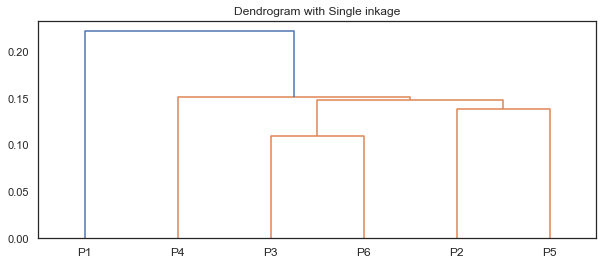

In [41]:
#plotting this for single linkage data
plt.figure(figsize=(10,4)) 
plt.title("Dendrogram using a single color")  
dend = shc.dendrogram(shc.linkage(data[['x cordinate', 'y cordinate']], method='single'), labels=data_set.index)

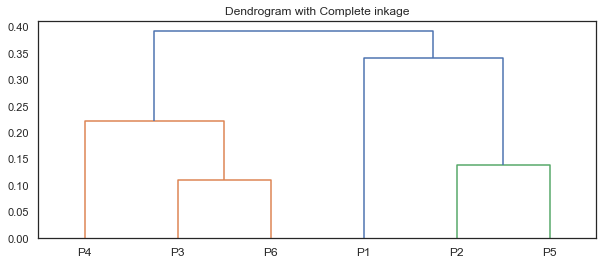

In [44]:
#plotting this for complete linkage data
plt.figure(figsize=(10,4)) 
plt.title("Dendrogram with all ink applied")  
dend = shc.dendrogram(shc.linkage(data[['x cordinate', 'y cordinate']], method='complete'), labels=data.index)

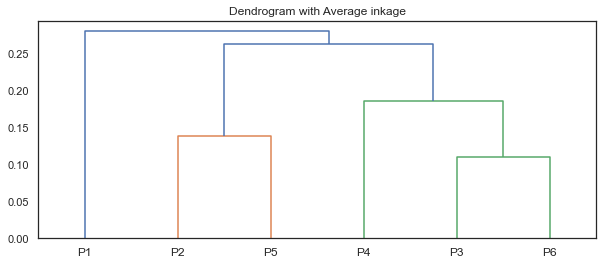

In [43]:
#plotting this for average linkagee data
plt.figure(figsize=(10,4)) 
plt.title("Dendrogram with typical ink coverage")  
dend = shc.dendrogram(shc.linkage(data[['x cordinate', 'y cordinate']], method='average'), labels=data.index)

2) Use CC_GENERAL.csv given in the folder and apply:
a) Preprocess the data by removing the categorical column and filling the missing values.
b) Apply StandardScaler() and normalize() functions to scale and normalize raw input data.
c) Use PCA with K=2 to reduce the input dimensions to two features.
d) Apply Agglomerative Clustering with k=2,3,4 and 5 on reduced features and visualize
result for each k value using scatter plot.
e) Evaluate different variations using Silhouette Scores and Visualize results with a bar chart.

In [21]:
#importing libraries
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('CC GENERAL.csv')
#printing csv folder
print("printing csv folder\n",df.head())
#printing null values before checking
print("printing null values before checking",df.isnull().any())
df.fillna(df.mean(), inplace=True)
#printing null values after checking mean for columns
print("printing null values after checking",df.isnull().any())


printing csv folder
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1              

In [14]:
df_column_drop = df.drop('CUST_ID', axis = 1)
print(df_column_drop)
#scaling the table columns
scaler = StandardScaler()
scaler.fit(df_column_drop)
A_scale_array = scaler.transform(df_column_drop)
#data normalization
A_normaliz = normalize(A_scale_array)
A_normaliz = pd.DataFrame(A_normaliz)
#reduction of the data's dimensionality
pca = PCA(n_components = 2)
#finding pca
A_principal_normalize = pca.fit_transform(X_normalized)
principalDataframe =  pd.DataFrame(data = A_principal_normalize, columns = [' pc1', ' pc2'])
finalDataframe = pd.concat([principalDataframe, df[['TENURE']]], axis = 1)
print(finalDataframe.head())

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

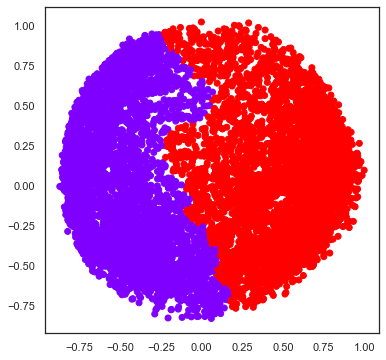

In [23]:
# cluster two
AgglomerativeClustering2 = AgglomerativeClustering(n_clusters = 2)
#clustering's visual representation
plt.figure(figsize =(6, 6))
plt.scatter(principalDf[' pc1'], principalDf['pc2'],
           c = AgglomerativeClustering2.fit_predict(principalDf), cmap ='rainbow')
#plotting graph based on principal data frame
plt.show()

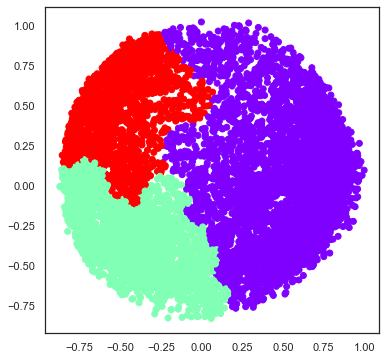

In [24]:
#cluster three
AgglomerativeClustering3 = AgglomerativeClustering(n_clusters = 3)
 
# clustering's visual representation
plt.figure(figsize =(6, 6))
plt.scatter(principalDf['pc1 '], principalDf[' pc2'],
           c = AgglomerativeClustering3.fit_predict(principalDf), cmap ='rainbow')
#plotting graph based on principal data frame
plt.show()

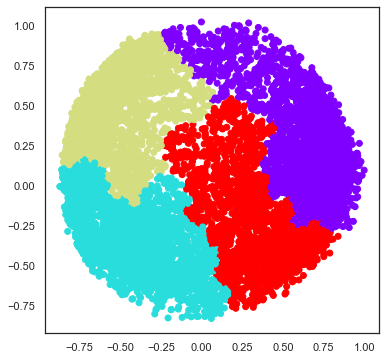

In [25]:
#cluster four
AgglomerativeClustering4 = AgglomerativeClustering(n_clusters = 4) 
# Clustering visualization
plt.figure(figsize =(6, 6))
plt.scatter(principalDf['pc1'], principalDf[' '],
           c = AgglomerativeClustering4.fit_predict(principalDf), cmap ='rainbow')
plt.show()

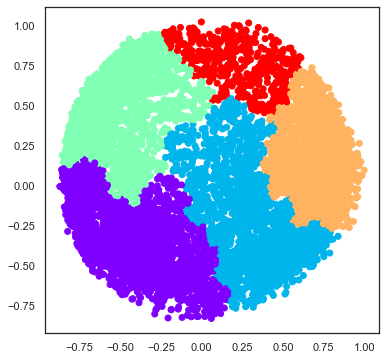

In [26]:
#cluster five
AgglomerativeClustering5 = AgglomerativeClustering(n_clusters = 5)
# Clustering visualization
plt.figure(figsize =(6, 6))
plt.scatter(principalDf[' pc1'], principalDf['pc2'],
           c = AgglomerativeClustering5.fit_predict(principalDf), cmap ='rainbow')
#plotting graph based on principal data frame
plt.show()

In [30]:

k_cluster = [2, 3, 4, 5]
 
# adding the various models' silhouette scores to the list
ss = []
# appending cluster two to principal dataframe
ss.append(
        silhouette_score(principalDf, AgglomerativeClustering2.fit_predict(principalDf)))
# appending cluster three to principal dataframe
ss.append(
        silhouette_score(principalDf, AgglomerativeClustering3.fit_predict(principalDf)))
# appending cluster four to principal dataframe
ss.append(
        silhouette_score(principalDf, AgglomerativeClustering4.fit_predict(principalDf)))
# appending cluster five to principal dataframe
ss.append(
        silhouette_score(principalDf, AgglomerativeClustering5.fit_predict(principalDf)))
#visualizing the results on bar chart

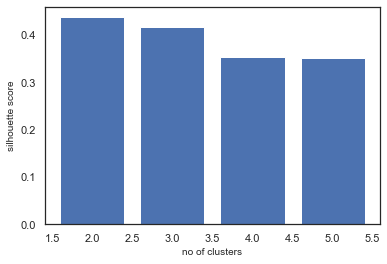

In [33]:
# making a bar chart to compare the outcomes
plt.bar(k, silhouette_scores)
#declaring x labels as no of clusters
plt.xlabel('no of clusters', fontsize = 10)
#declaring y label as silhouette score
plt.ylabel('silhouette score', fontsize = 10)
#plotting clusters and silhouette scores by using bar graph
plt.show()